**Le contexte**

League of Legends est un MOBA (arène de combat multijoueur en ligne) où s'affrontent 2 équipes (bleues et rouges). Il y a 3 voies, une jungle et 5 rôles. Le but est d'abattre le Nexus ennemi pour gagner la partie.

**Teneur**

Cet ensemble de données contient les 10 premières minutes. stats d'env. 10k jeux classés (SOLO QUEUE) à partir d'un ELO élevé (DIAMOND I à MASTER). Les joueurs ont à peu près le même niveau.

Chaque jeu est unique. Le gameId peut vous aider à récupérer plus d'attributs de l'API Riot.

Il y a 19 fonctionnalités par équipe (38 au total) collectées après 10 minutes de jeu. Cela inclut les victoires, les morts, l'or.


**Glossaire**

Ward : un objet qu'un joueur peut mettre sur la carte pour révéler la zone à proximité. Très utile pour le contrôle de la carte / des objectifs.

Minions: PNJ appartenant aux deux équipes. Ils donnent de l'or lorsqu'ils sont tués par des joueurs.

Jungle Minions: PNJ qui n'appartiennent à AUCUNE ÉQUIPE. Ils donnent de l'or et des buffs lorsqu'ils sont tués par des joueurs.

Elite monster: monstres avec des PV / dégâts élevés qui donnent un bonus énorme (or / XP / statistiques) lorsqu'ils sont tués par une équipe.

Dragons: monstre d'élite qui donne un bonus d'équipe lorsqu'il est tué. Le 4e dragon tué par une équipe donne un énorme bonus de statistiques. Le 5ème dragon (Elder Dragon) offre un énorme avantage à l'équipe.

Herald: monstre d'élite qui donne un bonus de statistiques lorsqu'il est tué par le joueur. Cela aide à pousser une voie et détruit des structures.

Turrets : structures que vous devez détruire pour atteindre le Nexus ennemi. Ils donnent de l'or.

Level : niveau Champion. Commencez à 1. Max est de 18.

In [ ]:
pip install mlxtend -U --quiet

In [ ]:
#imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

In [ ]:
#dataset
#source : https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
data = pd.read_csv('/content/high_diamond_ranked_10min.csv')

In [ ]:
#une petite description sur notre data 
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000



*    gameID : identificateur unique de la partie dans la base de données de riot games

*   bluewins : contient 1 si l'équipe bleu a gagné la partie sinon 0

*   blueWardsPlaced : contient le nombre de objets de vision placé dans le terrain par l'équipe bleu 

*   blueFirstBlood : contient 1 si un joueur de l'équipe bleu a reussi en gagné le premier kill de match qui donne plus de gold que les autres kills 

*   blueKills : le nombre total de kills par l'équipe bleu
*   blueDeaths : le nombre total de morts par l'équipe bleu


*   blueAssists : le nombre des contributions de membres d'équipes 


*   blueEliteMonsters ,blueDragons,	blueHeralds: nombre total de monsters epic tué par l'équipe bleu , ici 0 ou 1 par colonne parceque le jeu donne vie a un monstre chaque 10 minutes 


*   blueTowersDestroyed : le nombre total de tours detruits qui protègent la base de l'equipe rouge


*   blueTotalGold : la somme total de gold gagné par les membres d'équipe






*   blueAvgLevel : le niveau moyenne de tous les joueurs de l'équipe bleu 

*   blueTotalMinionsKilled : nombre de minions tués par l'équipe , les minions sont les entités qui donne le gold et l'experience ( pour augmenter le niveu ) 
*  Les memes colonnes se repètent pour l'équipe adversaire rouge sauf les colonnes qui donnent une description sur le deux équipes ex : bluewins si l'équipe blue a gagné (1) alors l'équipe rouge a forcement perdue (0)








In [ ]:
#les 10 premiers lignes
data.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [ ]:
#suppression des colonnes unitiles : gameID , TotalExperience puisque il exist le niveu moyenne(avgLevel) 
#qui peut le remplacer car on passe a un niveau sup si on gagne un nombre bien défini d'experience , redGoldDiff = -blueGoldDiff donc 
#il suffit de garder l'un de deux et meme chose pour blueExperienceDiff = -redExperienceDiff et blueFirstBlood = 0 <=> redFirstBlood = 1
#blueKills = redKills et vise versa ,redTotalGold = BlueTotalGold - blueGoldDiff
data = data.drop(['gameId','blueTotalExperience','redTotalExperience','redGoldDiff','redExperienceDiff','redFirstBlood','redKills','redDeaths','redTotalGold'] , axis = 1)

In [ ]:
#supprimer les lignes contenant des valeurs null
data = data.dropna()

In [ ]:
#notre data contient 9879 individu(matche) et 31 variable
data.shape

(9879, 31)

Nombre de victoires:  4930
Nombre de perts :  4949


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


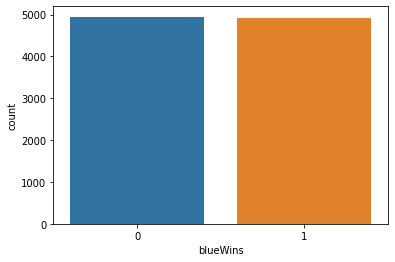

In [ ]:
y = data['blueWins']
ax = sea.countplot(y,label="Count") 
V, P = y.value_counts()
print('Nombre de victoires: ',P)
print('Nombre de perts : ',V)

Notre data est equilibré entre victoire et perte donc il est difficile de determiner les facteurs qui identifie l'équipe gagnant sans un analyse ACP

In [ ]:
x = data.drop(['blueWins'],axis = 1 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

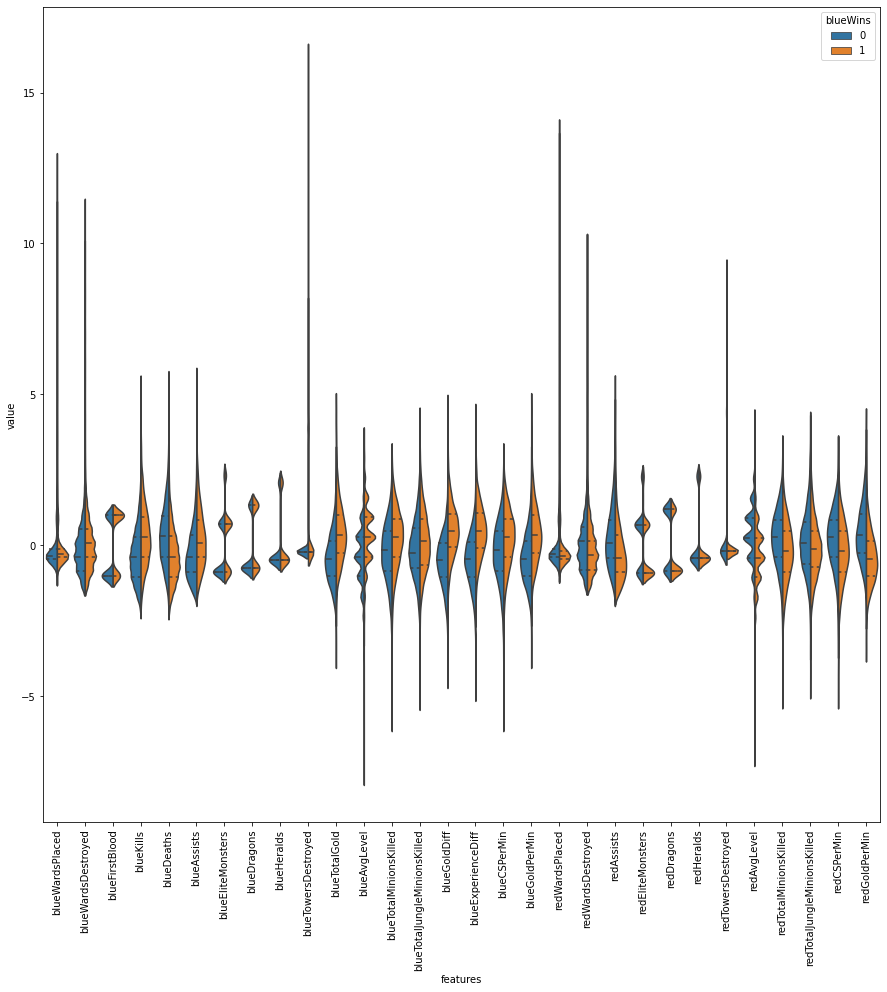

In [ ]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # centrage et reduction :  X - moyenne / ecart type
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="blueWins",var_name="features",value_name='value')
plt.figure(figsize=(15,15))
sea.violinplot(x="features", y="value", hue="blueWins", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

on peut retenir certains informations a partir de ce graphe comme les formes similaires de [blueEliteMonsters	blueDragons	blueHeralds] et [redEliteMonsters	redDragons	redHeralds] ce qui est logique puisque il existe un seul herald,dragon EliteMonster pendant les 10 minutes du match

aussi si on observe le median de blueKills il est le meme  pour le deux group ce qui est mauvais pour la classification après , au contraire pour blueTotalGold

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

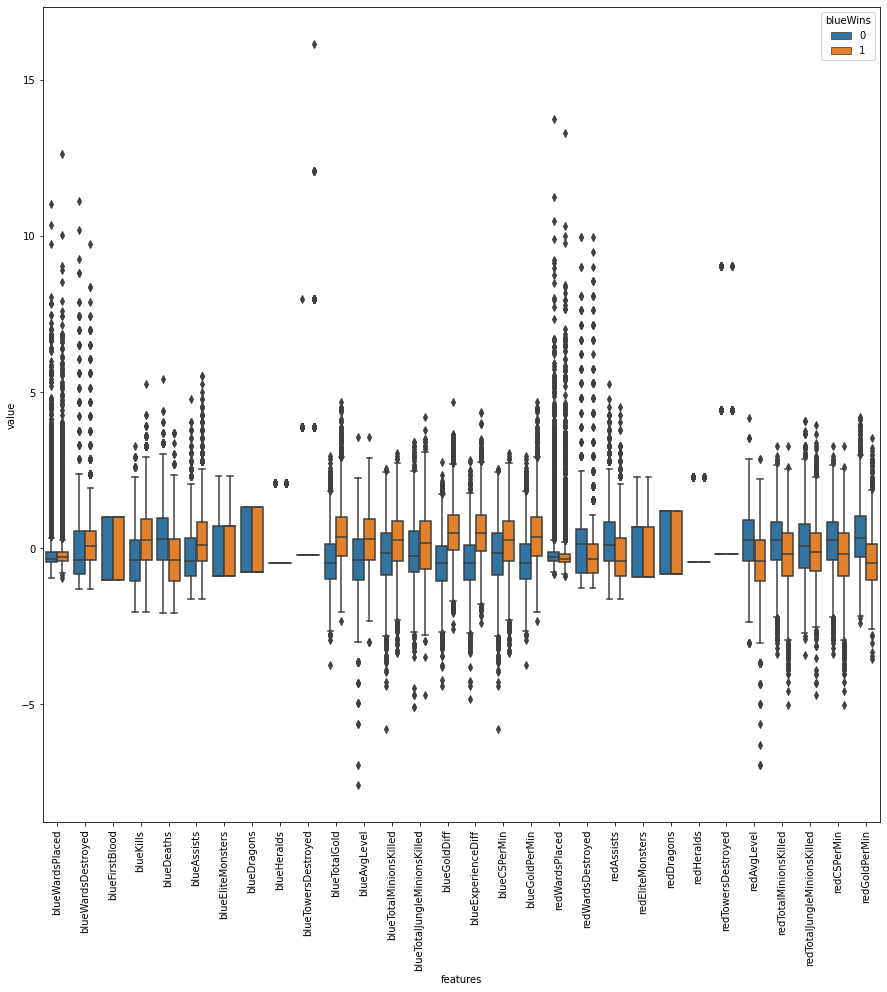

In [ ]:
plt.figure(figsize=(15,15))
sea.boxplot(x="features", y="value", hue="blueWins", data=data)
plt.xticks(rotation=90)

on peut conclure de cette visualisation que les deux variables : BlueKills et blueDeaths sont faiblement corrélés  , blueGolddiff et blueExperienceDiff sont corrélés positivement

pour comparer deux variables plus profondement on peut faire la jointure de deux variables dans la figure de regression lineaire suivant : 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


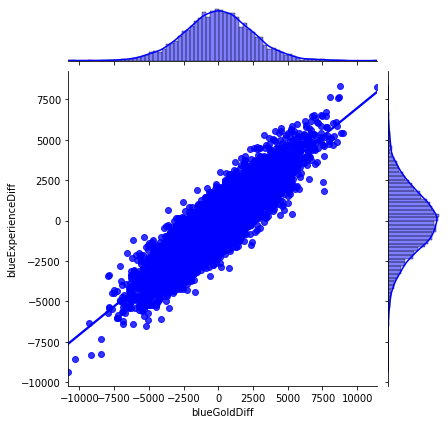

In [ ]:
sea.jointplot(x.loc[:,'blueGoldDiff'], x.loc[:,'blueExperienceDiff'], kind="reg", color="blue")

la forme alongé de nuage confirme la forte correlation.

on peut aussi visualiser les 4 variables ensemble :


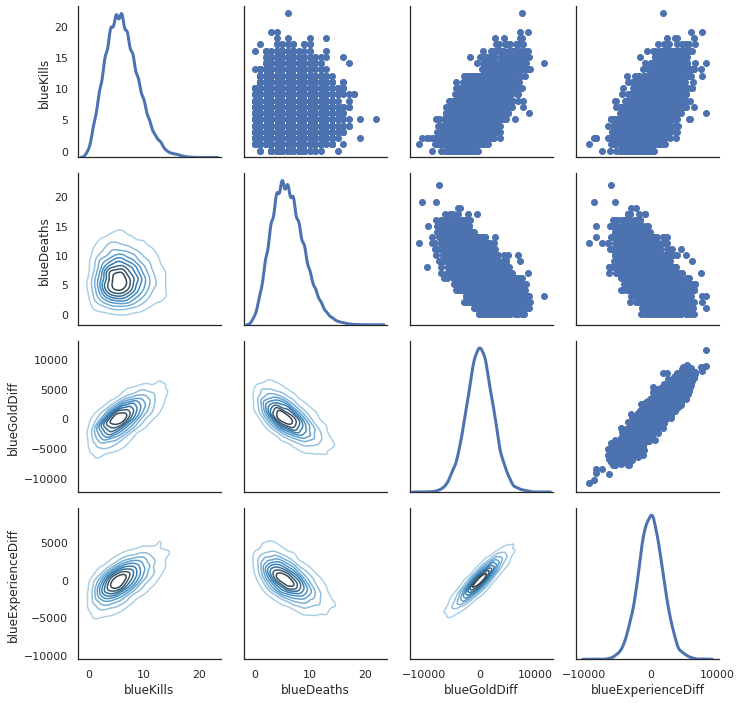

In [ ]:
sea.set(style="white")
df = x.loc[:,['blueKills','blueDeaths','blueGoldDiff','blueExperienceDiff']]
g = sea.PairGrid(df, diag_sharey=False)
g.map_lower(sea.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sea.kdeplot, lw=3)

apres cette visualisation qui donne des premiers conclusions sur les correlations entre certain variable , on peut voir la matrice de correlation et confirmer les conclusions graphique

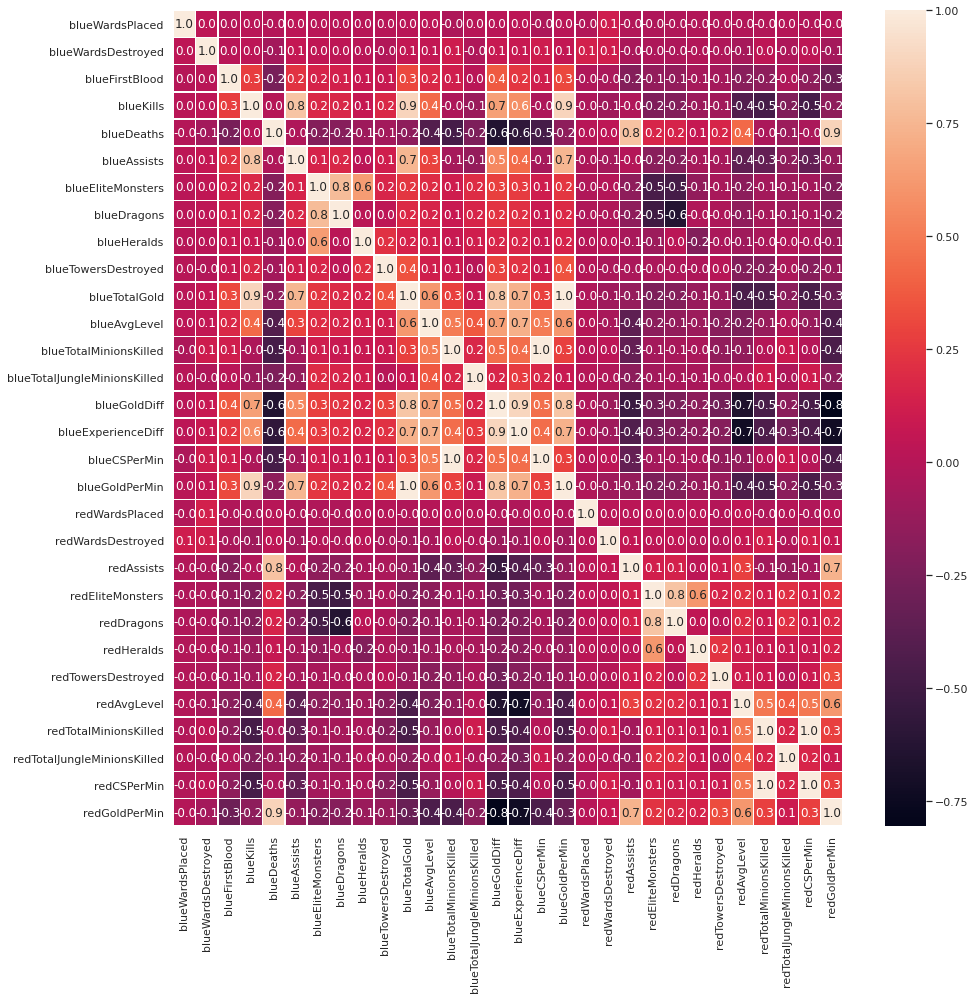

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sea.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

la matrice au dessus degage des forts correlations :


*   blueDeaths et redGoldPerMin : 0.9
*   blueTotalGold et blueGoldPerMin : 1.0
*   blueCsPerMin et BlueTotalMinionsKilled : 1.0
*   BlueKills et BlueGoldPerMin: 0.9
*   redCsPerMin et redTotalMinionsKilled : 1.0
*   blueTotalGold et BlueKills : 0.9

on peut eliminer certains entre eux

et ensuite on va appliquer le pca et passer a une dimension reduite grace au classes StandardScaler() et PCA() de la bibliothèque scikit-learn







In [ ]:
x = x.drop(['blueGoldPerMin','redCSPerMin','redGoldPerMin','blueCSPerMin'],axis = 1)

In [ ]:
X_std = StandardScaler().fit_transform(x) #standariser le data
pca = PCA(n_components=2)  #passer a un SEV de dimension 2
X_pca = pca.fit_transform(X_std)

In [ ]:
X_reduite = pd.DataFrame(data = X_pca
             , columns = ['composant principal 1', 'composant principal 2' ] )

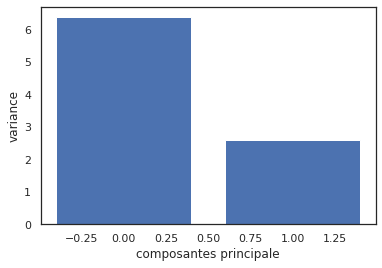

In [ ]:
#variance expliquée  pour connaitre le volume d'informations apporté par chaque composant principal
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('composantes principale')
plt.ylabel('variance')
plt.show()

In [ ]:
X_reduite = pd.concat([X_reduite,y],axis = 1)

In [ ]:
X_reduite.head()

,composant principal 1,composant principal 2,blueWins
0,0.499001,2.012361,0
1,-3.497256,0.734352,0
2,-1.007052,1.781002,0
3,-0.603432,-1.092156,0
4,-1.108434,-0.044380,0


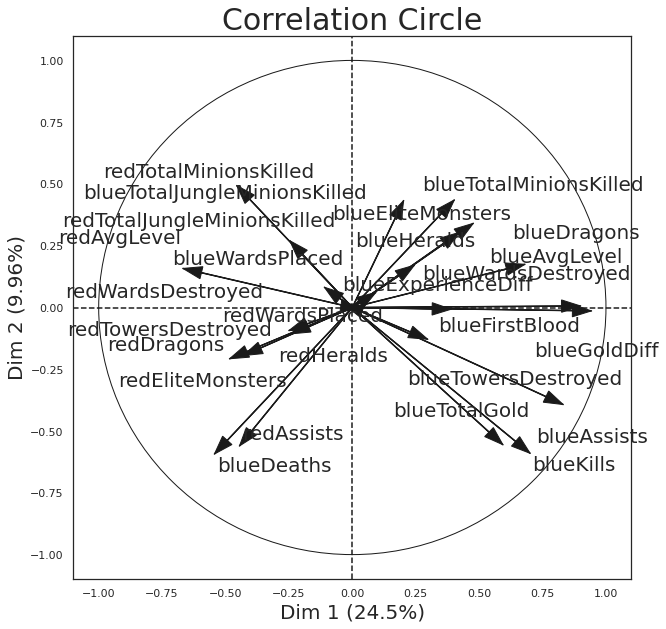

In [ ]:
#cercle de correlation
feature_names = x.columns

figure, correlation_matrix = plot_pca_correlation_graph(X_std, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)